In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df=pd.read_csv('HeightWeight.csv')

In [35]:
df.head(1)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925


In [36]:
# Normalizing the df
from sklearn.preprocessing import StandardScaler
x=df['Height(Inches)'].values.reshape(-1,1)
y=df['Weight(Pounds)'].values.reshape(-1,1)

In [37]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [38]:
# Calculating initial cost value
x=np.c_[(np.ones((len(x_scaled),1))),x_scaled]

In [39]:
theta=np.zeros((x.shape[1],1))

# Custom made LinearRegression without using scikit-learn library

In [40]:
class LinearRegression:
    
    def __init__(self, alpha=0.01, n_iterations=1000):
        self.alpha = alpha
        self.n_iterations = n_iterations
        self.theta = None
    
    def predict(self, x):
        return np.dot(x, self.theta)

    def compute_cost(self, x, y):
        m = len(y)
        predictions = self.predict(x)
        error = predictions - y
        cost = (1 / (2 * m)) * np.sum(error ** 2)
        return cost
    
    def gradient_descent(self, x, y):
        m = len(y)
        cost_history = []
        
        for i in range(self.n_iterations):
            predictions = self.predict(x)
            errors = predictions - y
            gradient = (1 / m) * np.dot(x.T, errors)
            self.theta -= self.alpha * gradient

            cost = self.compute_cost(x, y)
            cost_history.append(cost)
            
            if i % 100 == 0:
                print(f"Iteration {i}: Cost {cost}")

        return self.theta, cost_history
    
    def fit(self, x, y):
        x = np.c_[(np.ones((len(x),1))),x]
        self.theta = np.zeros((x.shape[1],1))
        self.theta, cost_history = self.gradient_descent(x, y)
        return self.theta, cost_history


In [41]:
model=LinearRegression()

In [42]:
theta,cost_history=model.fit(x_scaled,y)

Iteration 0: Cost 7981.548747407887
Iteration 100: Cost 1113.354173007936
Iteration 200: Cost 193.15569706861547
Iteration 300: Cost 69.86780445747225
Iteration 400: Cost 53.34973269150818
Iteration 500: Cost 51.13664680702379
Iteration 600: Cost 50.84013827978784
Iteration 700: Cost 50.800412163716146
Iteration 800: Cost 50.79508967160149
Iteration 900: Cost 50.79437656583853


In [43]:
theta

array([[127.07393498],
       [  5.86341128]])

In [44]:
predictions=model.predict(x)

In [45]:
predictions

array([[120.26035181],
       [137.93376743],
       [131.40796378],
       ...,
       [116.9156643 ],
       [125.64346842],
       [129.80114107]])

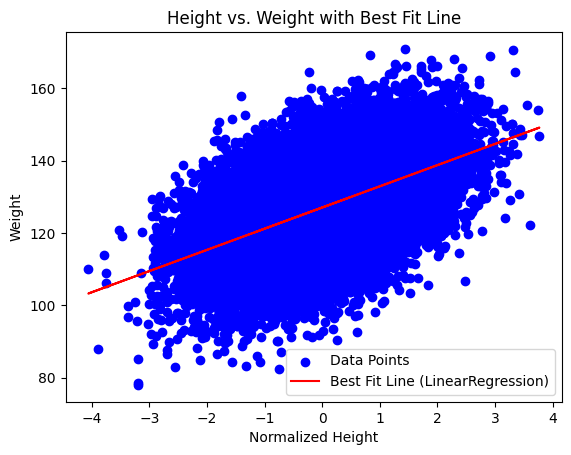

In [55]:
# Plotting the data points
plt.scatter(x_scaled, y, color='blue', label='Data Points')
plt.plot(x_scaled, predictions, color='red', label='Best Fit Line (LinearRegression)')

plt.xlabel('Normalized Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight with Best Fit Line')

plt.legend()
plt.show()


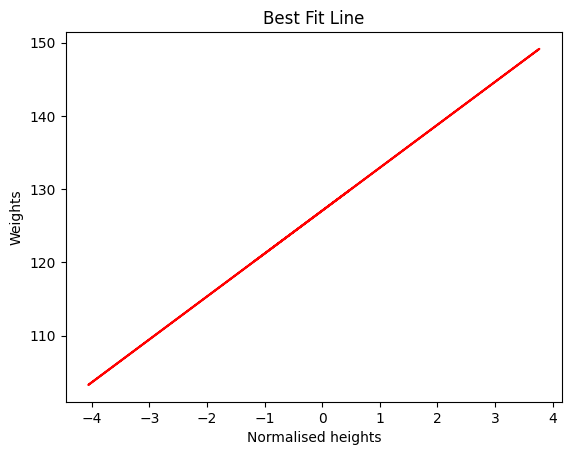

In [46]:
plt.plot(x_scaled,predictions,color='red',label='Best fit line')
plt.xlabel('Normalised heights')
plt.ylabel('Weights')
plt.title('Best Fit Line')
plt.show()

# Linear Regression using sklearn

In [47]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()

In [48]:
model1.fit(x_scaled,y)

LinearRegression()

In [49]:
model1.coef_

array([[5.86366442]])

In [50]:
model1.intercept_

array([127.07942116])

In [51]:
y_pred=model1.predict(x_scaled)

In [52]:
y_pred

array([[120.26554382],
       [137.93972246],
       [131.41363707],
       ...,
       [116.92071191],
       [125.64889284],
       [129.80674499]])

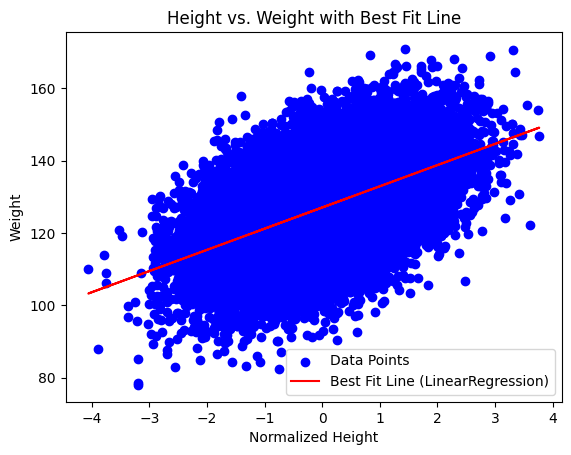

In [53]:
# Plotting the data points
plt.scatter(x_scaled, y, color='blue', label='Data Points')
plt.plot(x_scaled, y_pred, color='red', label='Best Fit Line (LinearRegression)')

plt.xlabel('Normalized Height')
plt.ylabel('Weight')
plt.title('Height vs. Weight with Best Fit Line')

plt.legend()
plt.show()


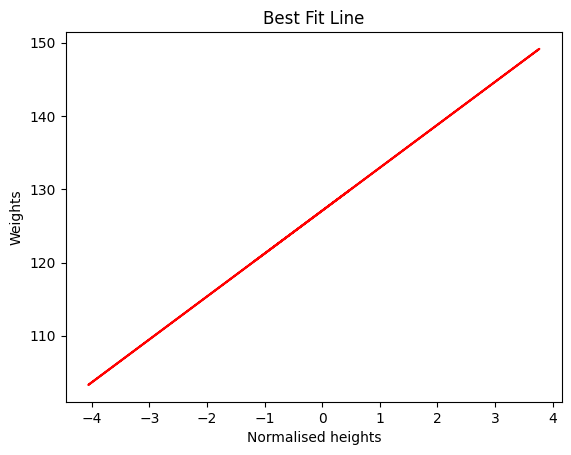

In [54]:
plt.plot(x_scaled,y_pred,color='red',label='Best fit line')
plt.xlabel('Normalised heights')
plt.ylabel('Weights')
plt.title('Best Fit Line')
plt.show()